In [11]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Tung\Documents\Python Projects\movies.csv')

# Cleaning up the data

# Locating any missing data

for col in df.columns:
    pct_missing = np.mean (df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))

# We will drop all rows with missing data

df = df.dropna()

In [29]:
# Data types for our columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [24]:
# Changing data of column 'budget' and 'gross'

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')


In [33]:
# Pulling year from release date for accuracy

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [39]:
# Sort data by gross revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [36]:
# Change setting to view data in full

pd.set_option('display.max_rows', None)

<function matplotlib.pyplot.show(close=None, block=None)>

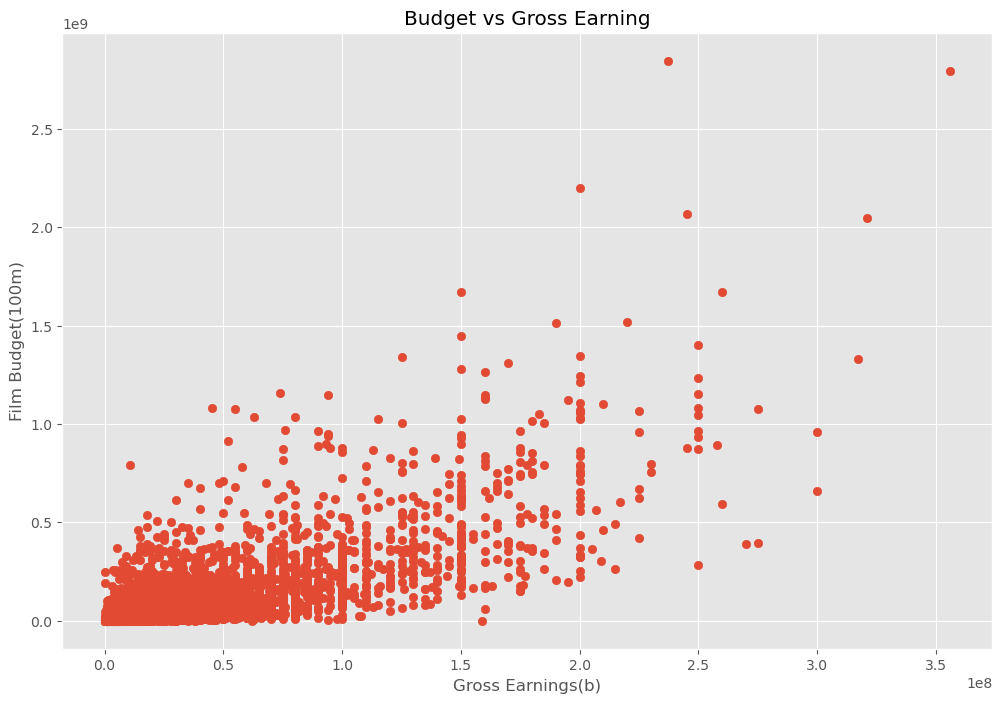

In [42]:
# Scatter plot budget and gross

plt.scatter (x=df['budget'], y=df['gross'])

plt.title ('Budget vs Gross Earning')
plt.xlabel('Gross Earnings(b)')
plt.ylabel('Film Budget(100m)')
plt.show

In [40]:
# Show table preview for easier viewing

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


Text(0, 0.5, 'Film Budget(100 million)')

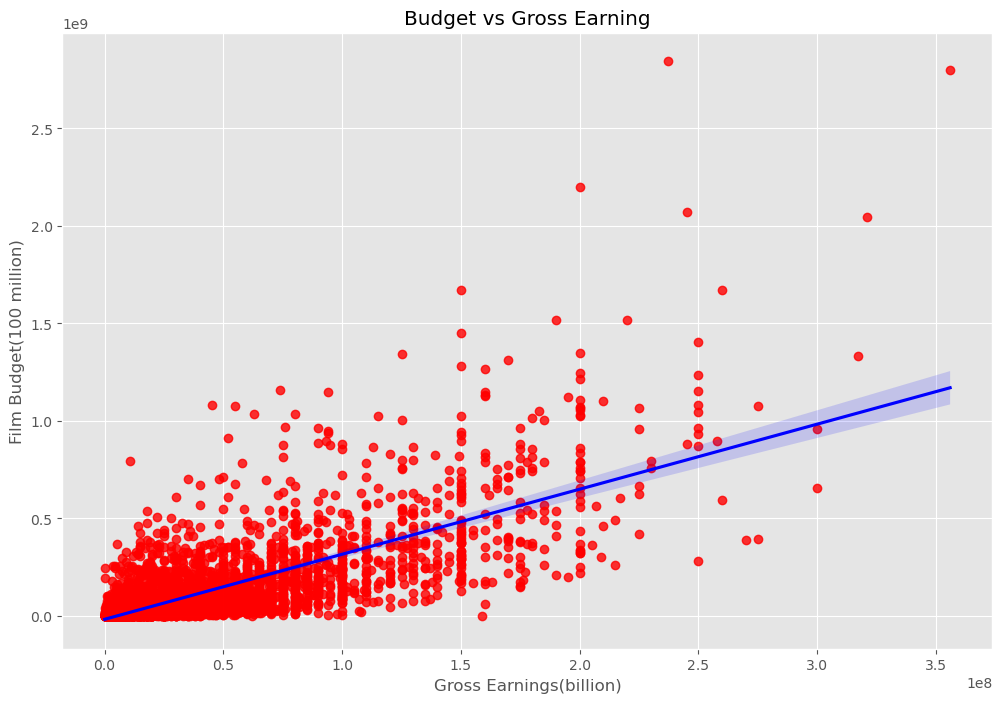

In [46]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.title ('Budget vs Gross Earning')
plt.xlabel('Gross Earnings(billion)')
plt.ylabel('Film Budget(100 million)')

In [51]:
# Look at correlation
# Methods pearson, kendall, spearman
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


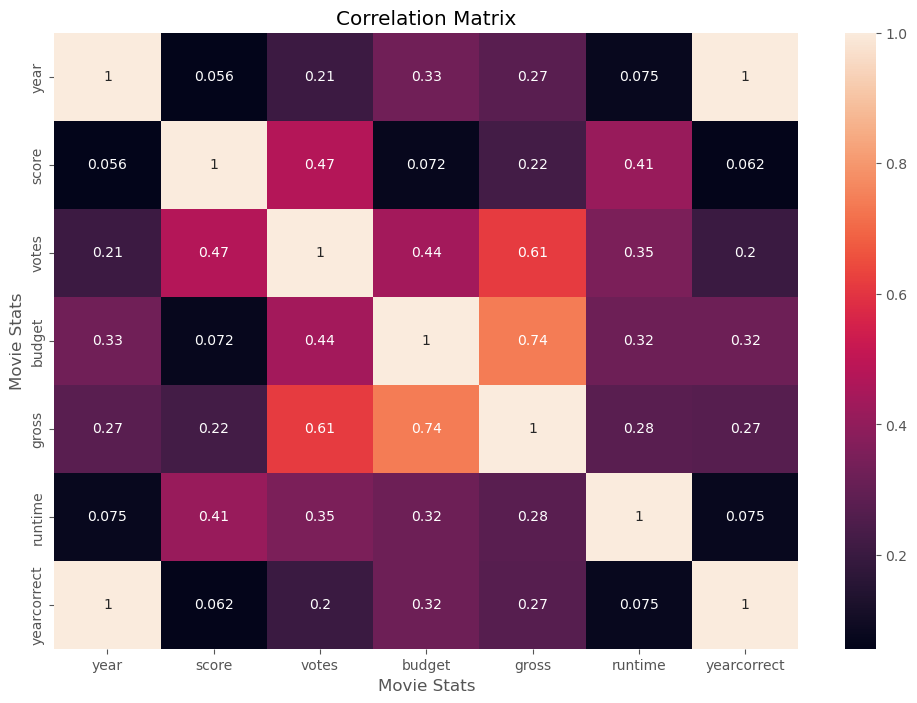

In [53]:
# High correlation between budget and gross, votes and gross.
# Visualise correlaction for numberical fields only

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

plt.title ('Correlation Matrix')
plt.xlabel('Movie Stats')
plt.ylabel('Movie Stats')

plt.show()

In [58]:
# Factorize assigns random numberic value to string data (e.g. Name, writer.)
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.262849
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.087261
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.071750
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.949995
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.358544
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.053108
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.287857
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.190556
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.230543
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.242124


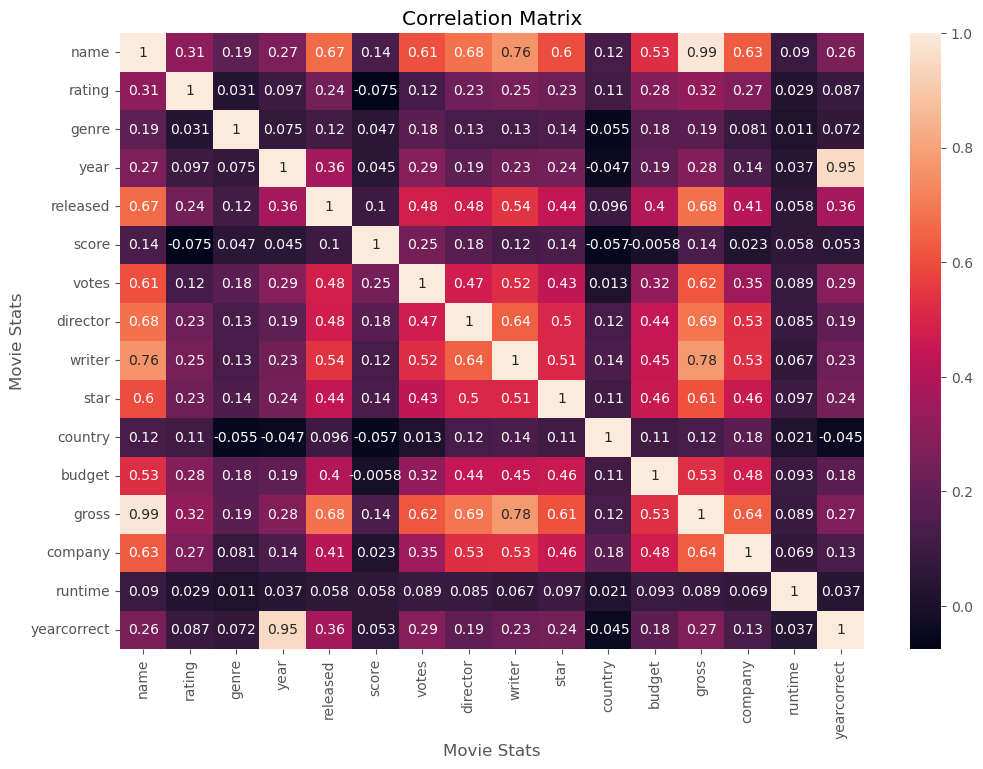

In [60]:
# Visualising Correlation between all fields including string data (e.g. Name, Writer)

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

plt.title ('Correlation Matrix')
plt.xlabel('Movie Stats')
plt.ylabel('Movie Stats')

plt.show()

In [68]:
# Correlation in unstacked format paired

corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

score        rating        -0.075109
rating       score         -0.075109
score        country       -0.057087
country      score         -0.057087
genre        country       -0.055109
country      genre         -0.055109
year         country       -0.047325
country      year          -0.047325
yearcorrect  country       -0.045134
country      yearcorrect   -0.045134
budget       score         -0.005767
score        budget        -0.005767
genre        runtime        0.011329
runtime      genre          0.011329
country      votes          0.013363
votes        country        0.013363
country      runtime        0.020546
runtime      country        0.020546
company      score          0.022732
score        company        0.022732
rating       runtime        0.029208
runtime      rating         0.029208
genre        rating         0.031419
rating       genre          0.031419
yearcorrect  runtime        0.036785
runtime      yearcorrect    0.036785
year         runtime        0.037011
r

In [76]:
# Only showing hight correlation for visibility

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

star         director       0.504992
director     star           0.504992
writer       star           0.510628
star         writer         0.510628
writer       votes          0.522918
votes        writer         0.522918
name         budget         0.526690
budget       name           0.526690
director     company        0.528071
company      director       0.528071
writer       company        0.532013
company      writer         0.532013
budget       gross          0.532810
gross        budget         0.532810
released     writer         0.541155
writer       released       0.541155
name         star           0.599410
star         name           0.599410
votes        name           0.608411
name         votes          0.608411
gross        star           0.612142
star         gross          0.612142
gross        votes          0.620450
votes        gross          0.620450
company      name           0.631721
name         company        0.631721
company      gross          0.637241
g

In [78]:
# Top 15 Movie companies by revenue

CompanyGrossRevenue = df.groupby('company')[['gross']].sum()
CompanyGrossRevenueSorted = CompanyGrossRevenue.sort_values('gross', ascending = False)[:15]
CompanyGrossRevenueSorted = CompanyGrossRevenueSorted['gross'].astype('int64')
CompanyGrossRevenueSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [92]:
# Show how many movies each studio released 

Total_movies_number = df['company'].value_counts()
Total_movies_number = Total_movies_number.astype('int64')
Total_movies_number

Universal Pictures                                                 330
Columbia Pictures                                                  302
Warner Bros.                                                       298
Paramount Pictures                                                 279
Twentieth Century Fox                                              209
New Line Cinema                                                    155
Walt Disney Pictures                                               107
Touchstone Pictures                                                105
Metro-Goldwyn-Mayer (MGM)                                           99
TriStar Pictures                                                    75
Dreamworks Pictures                                                 75
Miramax                                                             66
Fox 2000 Pictures                                                   58
Summit Entertainment                                                57
Screen

In [93]:
# Average Revenue per movie

Avg_Revenue = CompanyGrossRevenueSorted/Total_movies_number

Avg_Revenue

"DIA" Productions GmbH & Co. KG                                             NaN
"Weathering With You" Film Partners                                         NaN
.406 Production                                                             NaN
1492 Pictures                                                               NaN
1818 Productions                                                            NaN
19 Entertainment                                                            NaN
1978 Films                                                                  NaN
1984 Private Defense Contractors                                            NaN
2 Loop Films                                                                NaN
2.0 Entertainment                                                           NaN
2.4.7. Films                                                                NaN
2003 Productions                                                            NaN
20th Century Studios                    